# Explore here

In [122]:
!pip install -r "/workspaces/ML/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable


In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
import timeit
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from pickle import dump


import sqlite3


In [124]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, delimiter=';')

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
df.shape

(41188, 21)

In [126]:
df.describe(include="O").T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [127]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

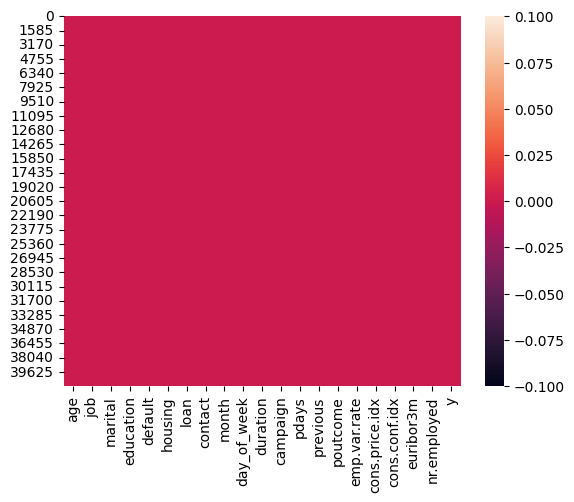

In [128]:
sns.heatmap(df.isnull())

<Axes: >

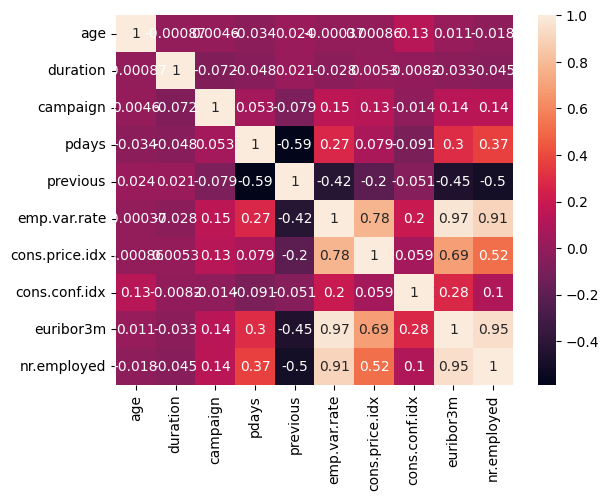

In [129]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

LABEL ENCODER

In [131]:
le = LabelEncoder()

df_encoded = df.apply(le.fit_transform)

In [132]:
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [133]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int64
 2   marital         41188 non-null  int64
 3   education       41188 non-null  int64
 4   default         41188 non-null  int64
 5   housing         41188 non-null  int64
 6   loan            41188 non-null  int64
 7   contact         41188 non-null  int64
 8   month           41188 non-null  int64
 9   day_of_week     41188 non-null  int64
 10  duration        41188 non-null  int64
 11  campaign        41188 non-null  int64
 12  pdays           41188 non-null  int64
 13  previous        41188 non-null  int64
 14  poutcome        41188 non-null  int64
 15  emp.var.rate    41188 non-null  int64
 16  cons.price.idx  41188 non-null  int64
 17  cons.conf.idx   41188 non-null  int64
 18  euribor3m       41188 non-

In [134]:
df_num = df.select_dtypes(include=np.number)

In [135]:
df_1 = df.select_dtypes(include="O")

In [136]:
df_1enc = df_1.apply(le.fit_transform)

In [137]:
df_1enc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [138]:
df_encoded = pd.concat([df_num, df_1enc], axis = 1)

In [139]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  job             41188 non-null  int64  
 11  marital         41188 non-null  int64  
 12  education       41188 non-null  int64  
 13  default         41188 non-null  int64  
 14  housing         41188 non-null  int64  
 15  loan            41188 non-null  int64  
 16  contact         41188 non-null  int64  
 17  month           41188 non-null 

Visualisation

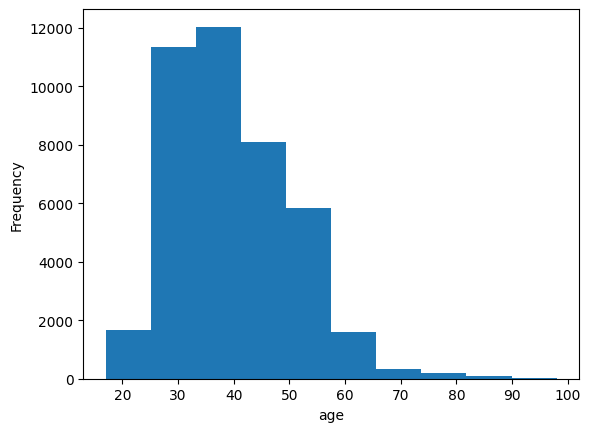

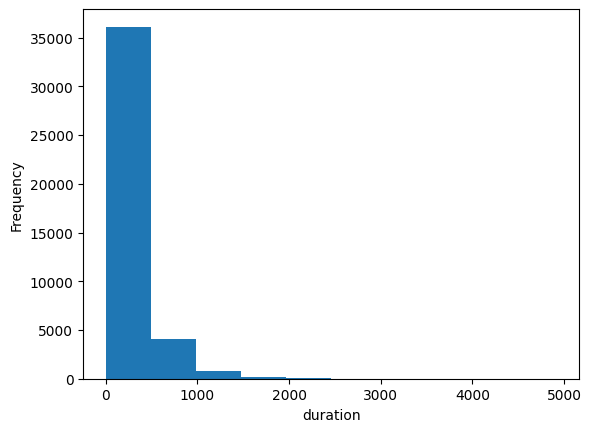

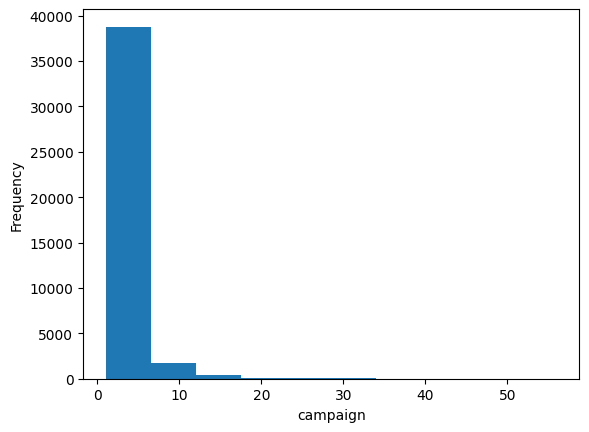

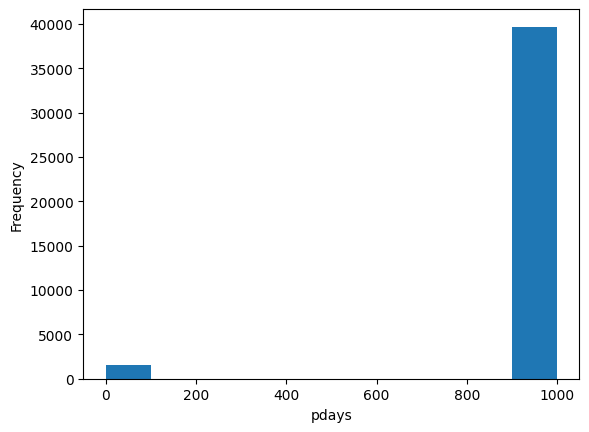

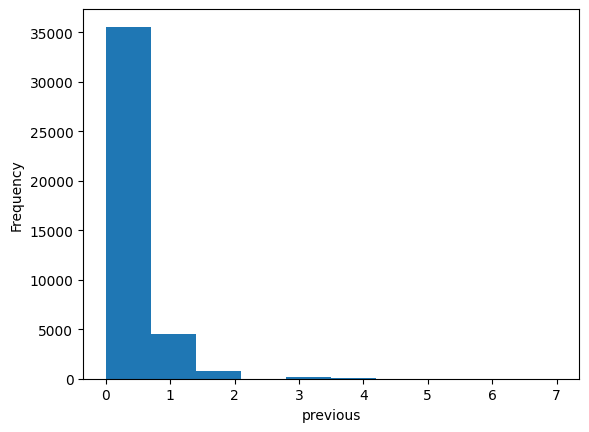

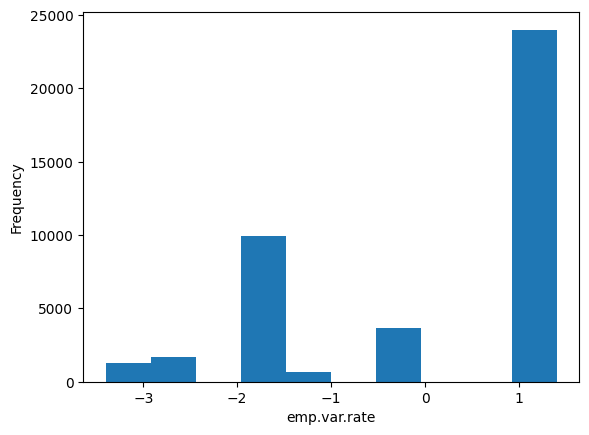

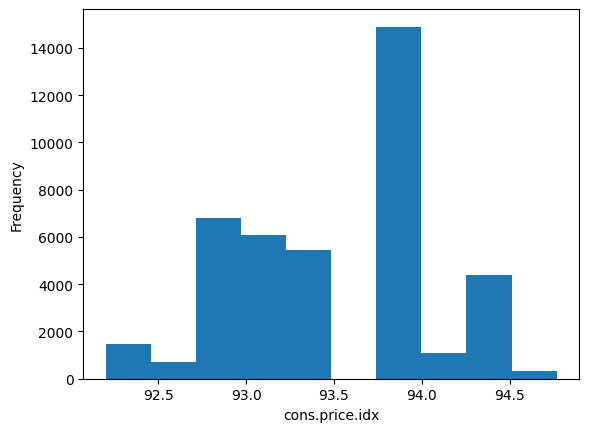

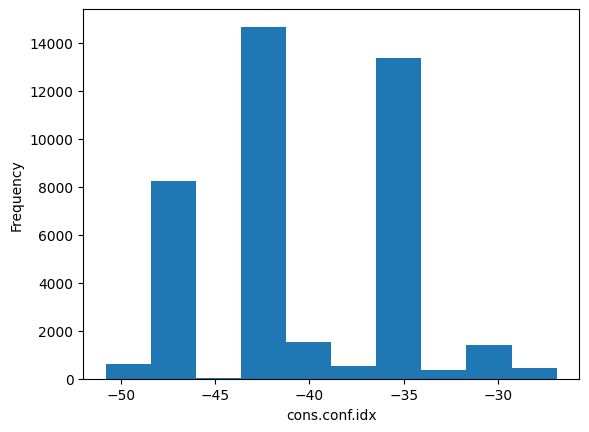

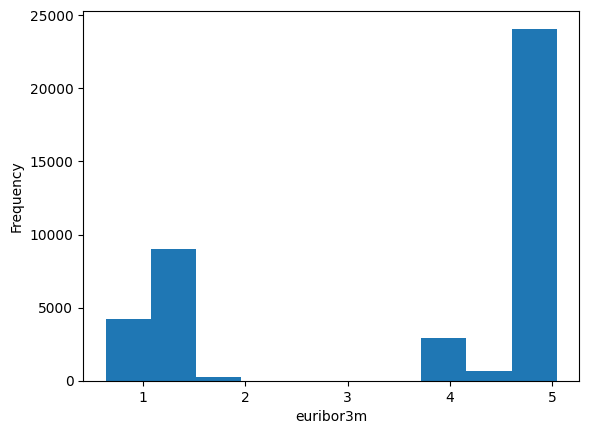

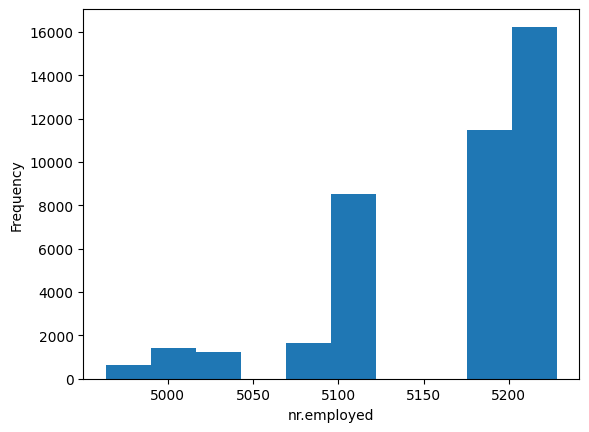

In [140]:
for c in df_num.columns:
    df_num[c].plot.hist()
    plt.xlabel(c)
    plt.show()

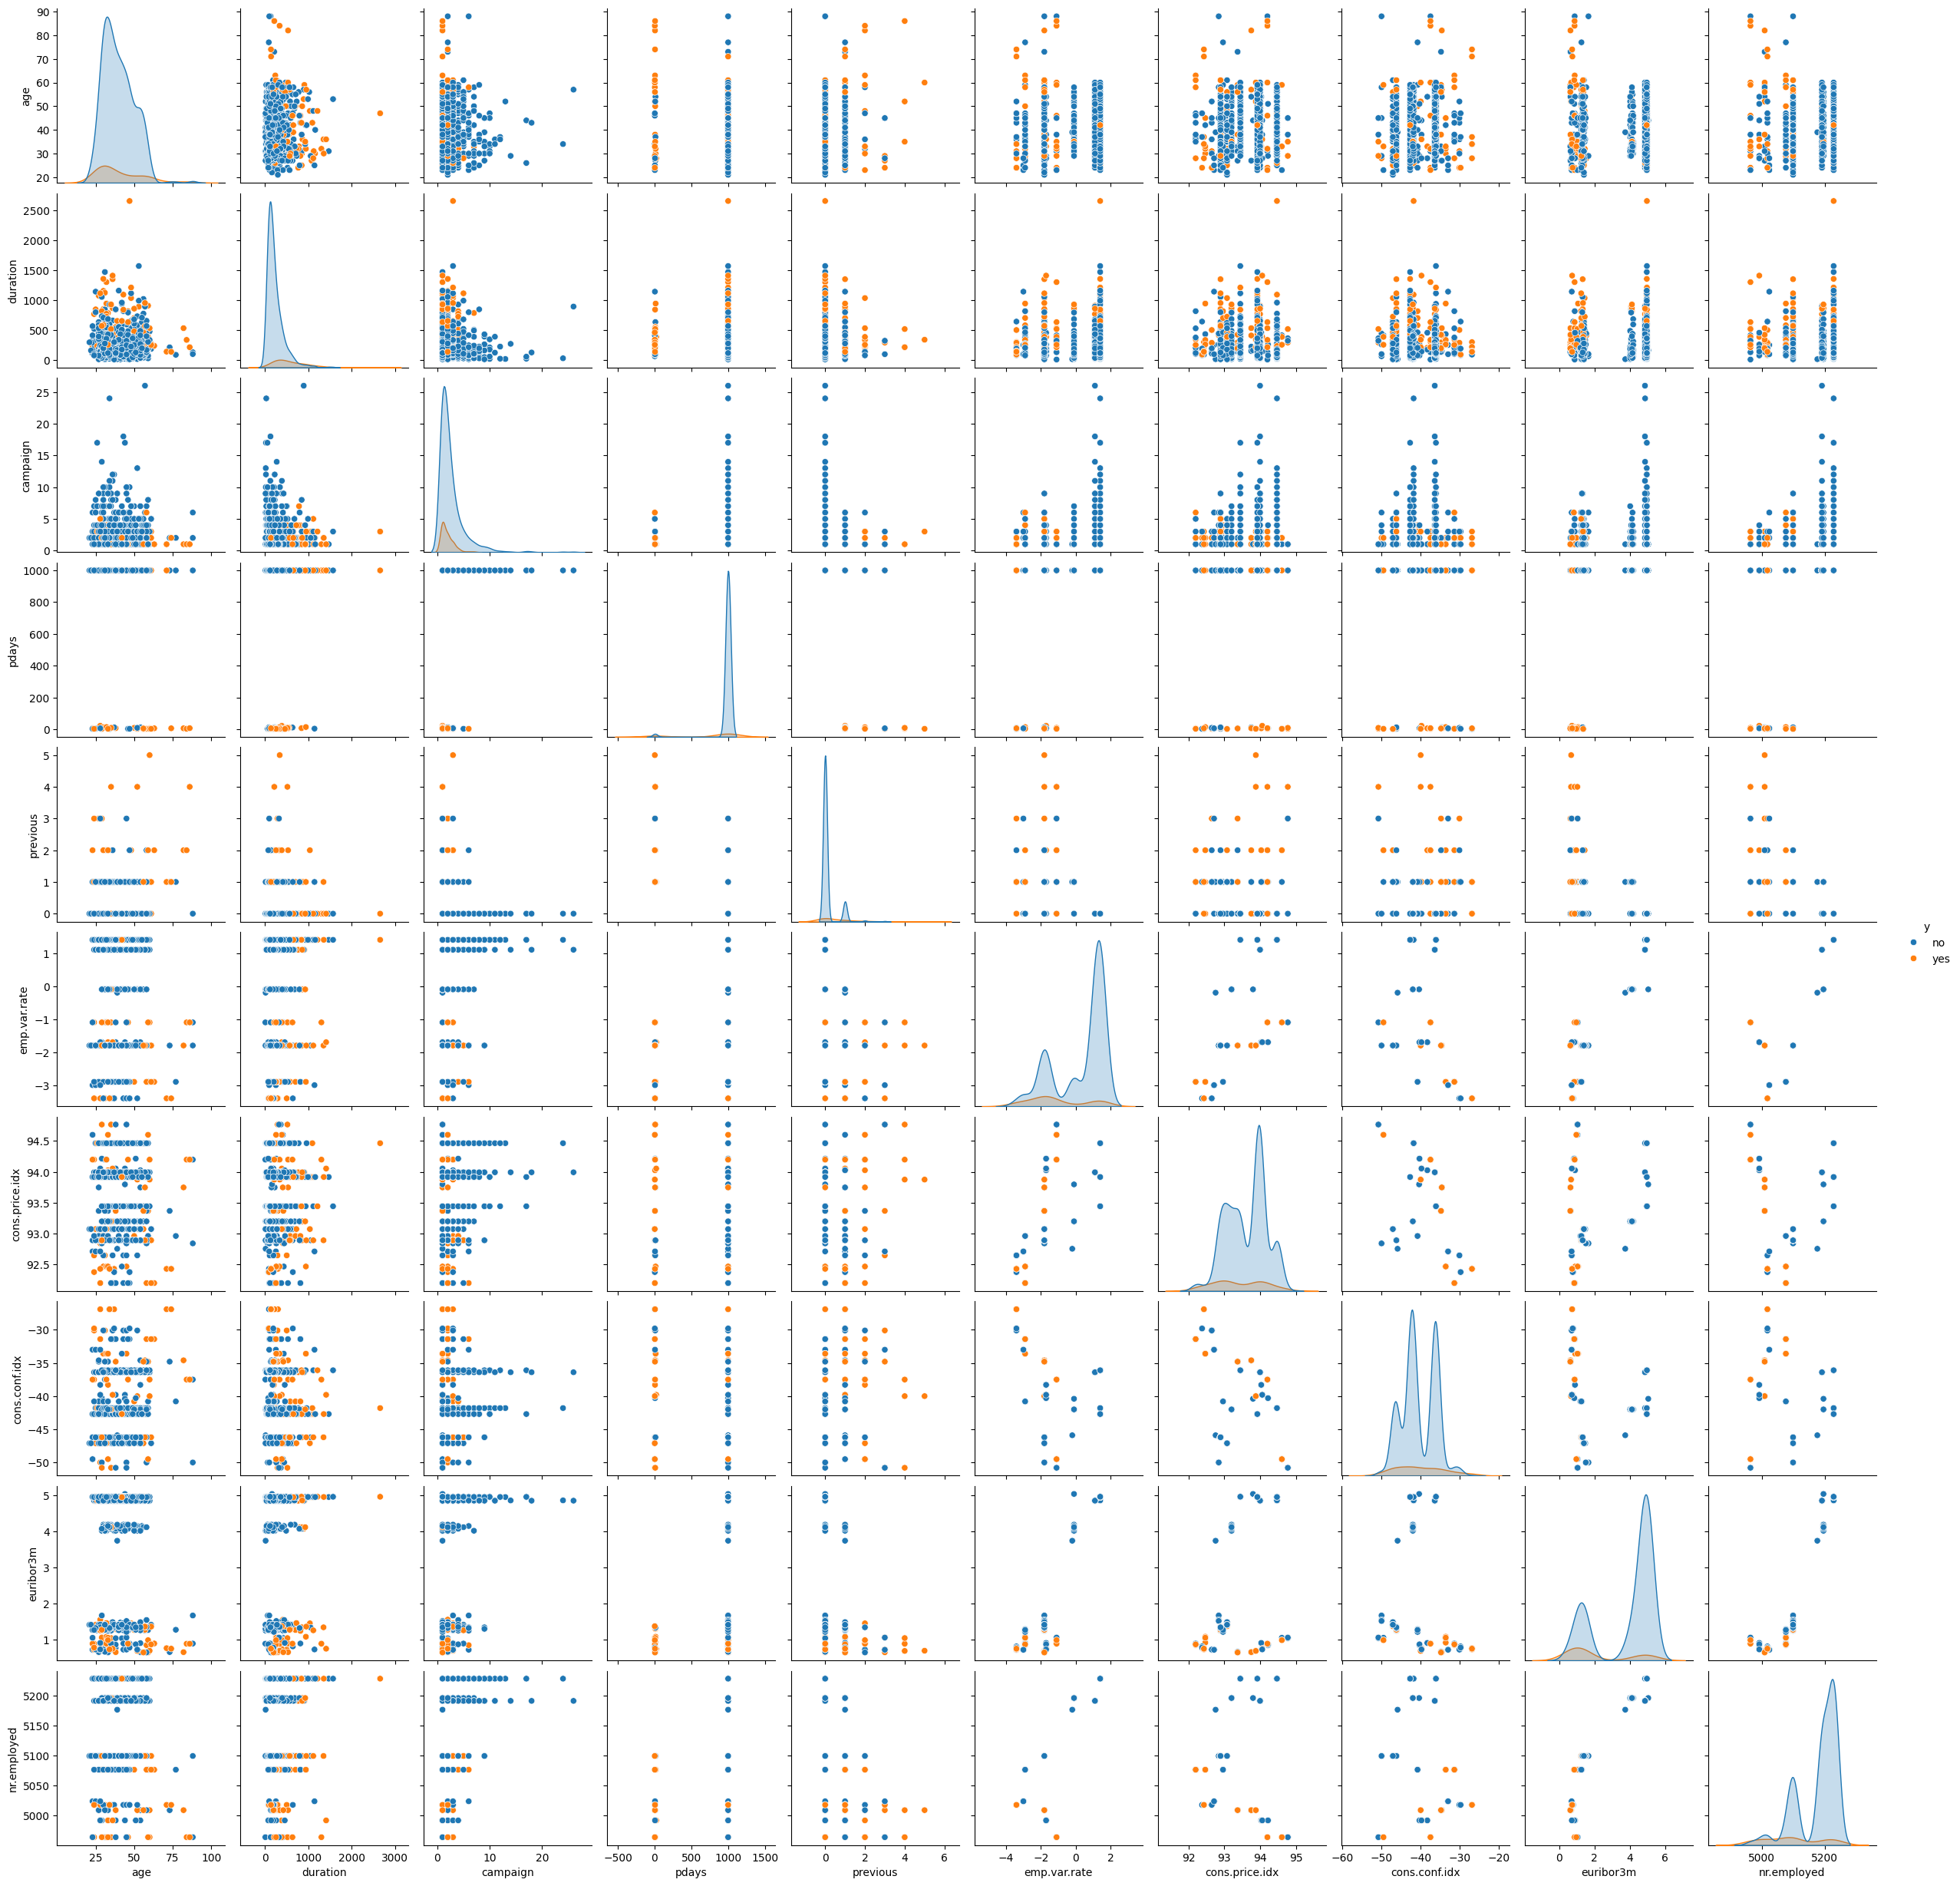

In [141]:
sns.pairplot((df.sample(800)), hue="y")

<Axes: ylabel='count'>

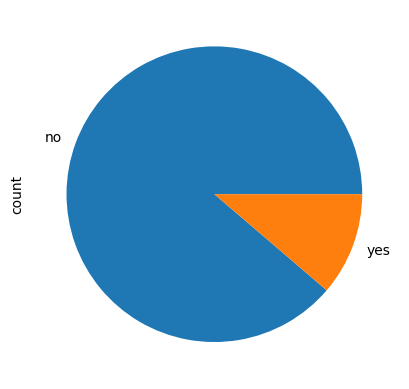

In [142]:
df.y.value_counts().plot.pie()

ML

In [143]:
X = df_encoded.drop("y", axis = 1)
y =  df_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
25611,49,227,4,999,0,-0.1,93.200,-42.0,4.120,5195.8,1,1,2,1,0,0,0,7,4,1
26010,37,202,2,999,1,-0.1,93.200,-42.0,4.120,5195.8,2,1,6,0,0,0,1,7,4,0
40194,78,1148,1,999,0,-1.7,94.215,-40.3,0.870,4991.6,5,1,0,0,0,0,0,3,1,1
297,36,120,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,6,0,2,0,1,6,1,1
36344,59,368,2,999,0,-2.9,92.963,-40.8,1.262,5076.2,5,0,6,0,0,0,0,4,3,1


<Axes: xlabel='y'>

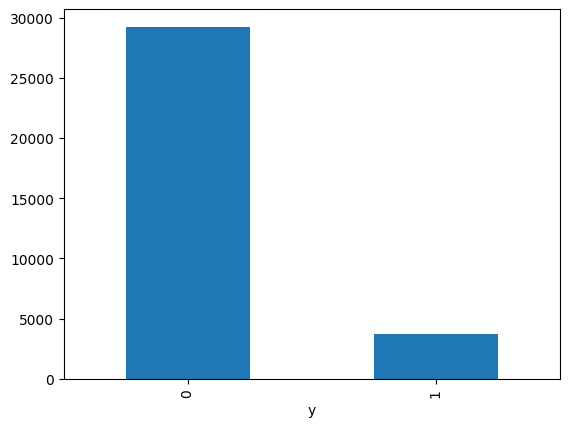

In [144]:
y_train.value_counts().plot.bar()

<Axes: xlabel='y'>

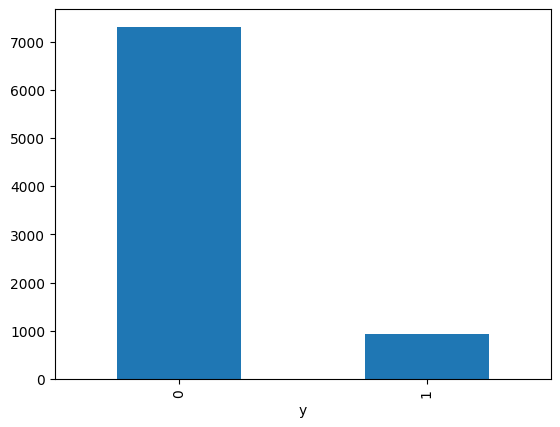

In [145]:
y_test.value_counts().plot.bar()

In [146]:
#same distribution in test and train sets

In [147]:
X_train.to_csv("X_train.csv")

In [148]:
y_train.to_csv("y_train.csv")

In [149]:
X_test.to_csv("X_test.csv")

In [150]:
y_test.to_csv("y_test.csv")

In [151]:
selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact
0,227.0,999.0,0.0,-0.1,93.200,4.120,5195.8,0.0
1,202.0,999.0,1.0,-0.1,93.200,4.120,5195.8,1.0
2,1148.0,999.0,0.0,-1.7,94.215,0.870,4991.6,0.0
3,120.0,999.0,0.0,1.1,93.994,4.857,5191.0,1.0
4,368.0,999.0,0.0,-2.9,92.963,1.262,5076.2,0.0


In [152]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns=X_test.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

X_train_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
25611,0.863739,-0.120196,0.522981,0.196584,-0.350127,-0.114858,-0.648967,-0.322269,0.288964,0.398990,-0.757779,-0.284871,-0.818379,1.933816,-1.08747,-0.453839,-0.758915,1.192670,1.427938,0.193670
26010,-0.289722,-0.216732,-0.203688,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.288964,0.398990,-0.479529,-0.284871,1.053452,-0.516547,-1.08747,-0.453839,1.317671,1.192670,1.427938,-2.552217
40194,3.651268,3.436173,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.583296,-2.420139,0.355224,-0.284871,-1.754295,-0.516547,-1.08747,-0.453839,-0.758915,-0.531722,-0.714554,0.193670
297,-0.385843,-0.533368,-0.203688,0.196584,-0.350127,0.648868,0.721890,0.887717,0.713535,0.332723,-1.036030,-0.284871,1.053452,-0.516547,0.94245,-0.453839,1.317671,0.761572,-0.714554,0.193670
36344,1.824956,0.424264,-0.203688,0.196584,-0.350127,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175,0.355224,-1.928167,1.053452,-0.516547,-1.08747,-0.453839,-0.758915,-0.100624,0.713774,0.193670


In [153]:
print(y.unique())

[0 1]


MODEL TRAINING

In [154]:
start_time = timeit.default_timer()
model = LogisticRegression()
model.fit(X_train, y_train)

print("training time", timeit.default_timer()-start_time)

training time 0.3049566629999845


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
y_pred = model.predict(X_test)


In [156]:
print(accuracy_score(y_test, y_pred))

0.9099295945617868


In [157]:
print(f1_score(y_test, y_pred))

0.4889807162534435


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.68      0.38      0.49       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



<Axes: >

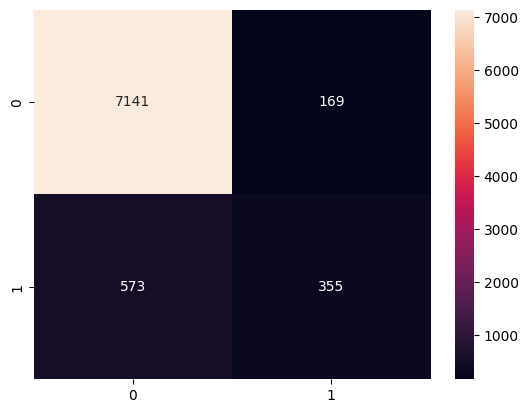

In [159]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [160]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [161]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random = RandomizedSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
random

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [162]:
random_output = random.fit(X_train, y_train)
random_output

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: Conv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [163]:
random_best = random.best_estimator_
random_best

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [164]:
y_pred = random_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [165]:
print(accuracy_score(y_test, y_pred))

0.9123573682932751


In [166]:
print(f1_score(y_test, y_pred))

0.5081743869209809


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.40      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



<Axes: >

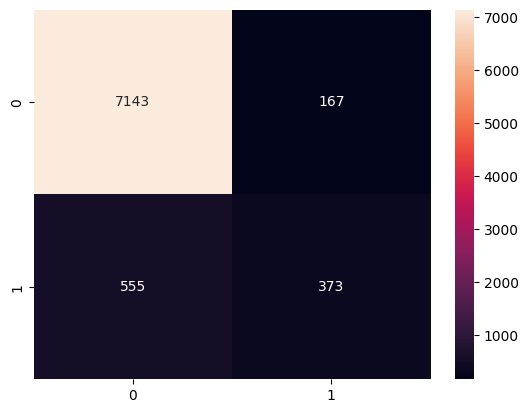

In [168]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [169]:
hyperparams = {
    "C": [10, 100, 1000],
    "penalty": ["l1", "l2"],
    "solver": ["newton-cg", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [170]:
grid_output = grid.fit(X_train, y_train)
grid_output

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [172]:
grid_best = grid_output.best_estimator_
grid_best

LogisticRegression(C=100, solver='newton-cg')

In [173]:
y_pred = grid_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [174]:
print(accuracy_score(y_test, y_pred))

0.9140568099053168


In [175]:
print(f1_score(y_test, y_pred))

0.5203252032520326


<Axes: >

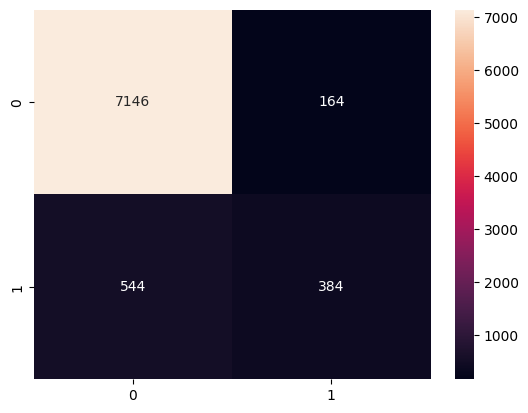

In [176]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [177]:
file=open("best_model.pkl", "wb")
pickle.dump(grid_best, file)

In [178]:
file=open("best_model.pkl", "rb")
model = pickle.load(file)

In [179]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [180]:
print(accuracy_score(y_test, y_pred))

0.9140568099053168


In [181]:
print(f1_score(y_test, y_pred))

0.5203252032520326


<Axes: >

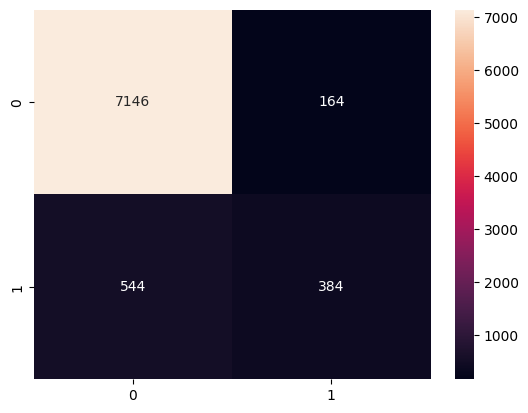

In [182]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")